In [302]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
import datetime
from sklearn.linear_model import LogisticRegression
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [303]:
#read the file
df = pd.read_csv("LoanStats.csv")

In [304]:
#checking the numbers of columns and rows in the dataframe
df.shape

(39786, 7)

In [305]:
#checking first 5 rows to see whether the right variables are in the dataset
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


## Data Understanding

In [306]:
#checking datatypes 
df.dtypes

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object

In [307]:
df.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [308]:
# checking the distribution of loan_terms (approved short term loans is higher than long term loans)
df["term"].value_counts()


36    29096
60    10690
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='int_rate'>

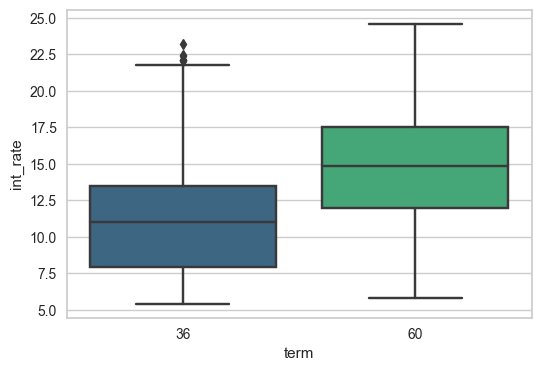

In [309]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="term", y="int_rate", palette="viridis")

In [310]:
#distribution of purpose of getting loan in the dataset 
df["purpose"].value_counts()


debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

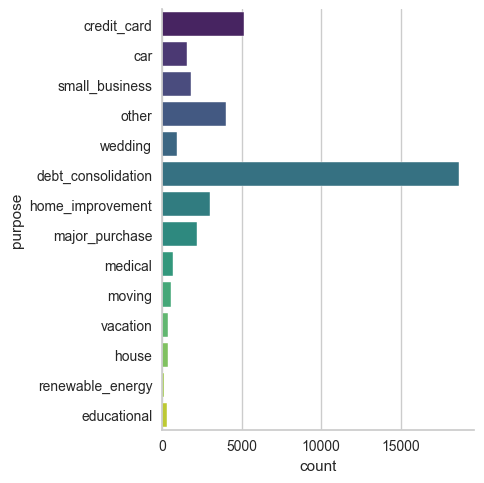

In [311]:
##distribution of purpose of getting loan in the dataset /
sns.set_style("whitegrid")
sns.catplot(
    data=df, y="purpose", kind="count",
    palette="viridis"
)

C:\Users\duygu\AppData\Local\Temp\ipykernel_12272\780383797.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



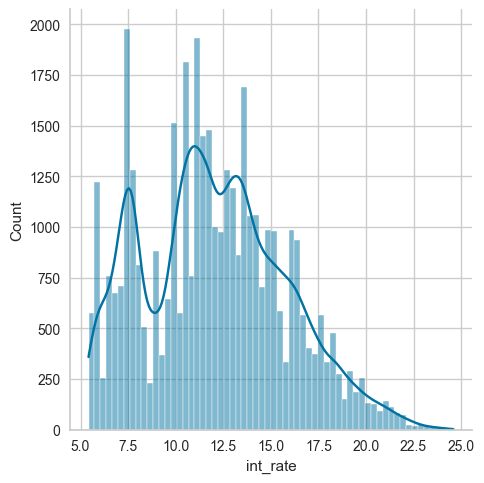

In [312]:
#distribution of the interest rate in the dataset 
sns.displot(data=df, x="int_rate", kde=True, palette="viridis")

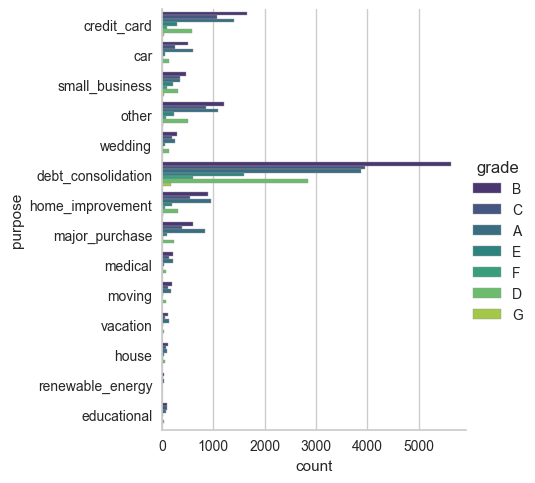

In [313]:
#
sns.catplot(
    data=df, y="purpose", hue="grade", kind="count",
    palette="viridis", edgecolor=".6",
)

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

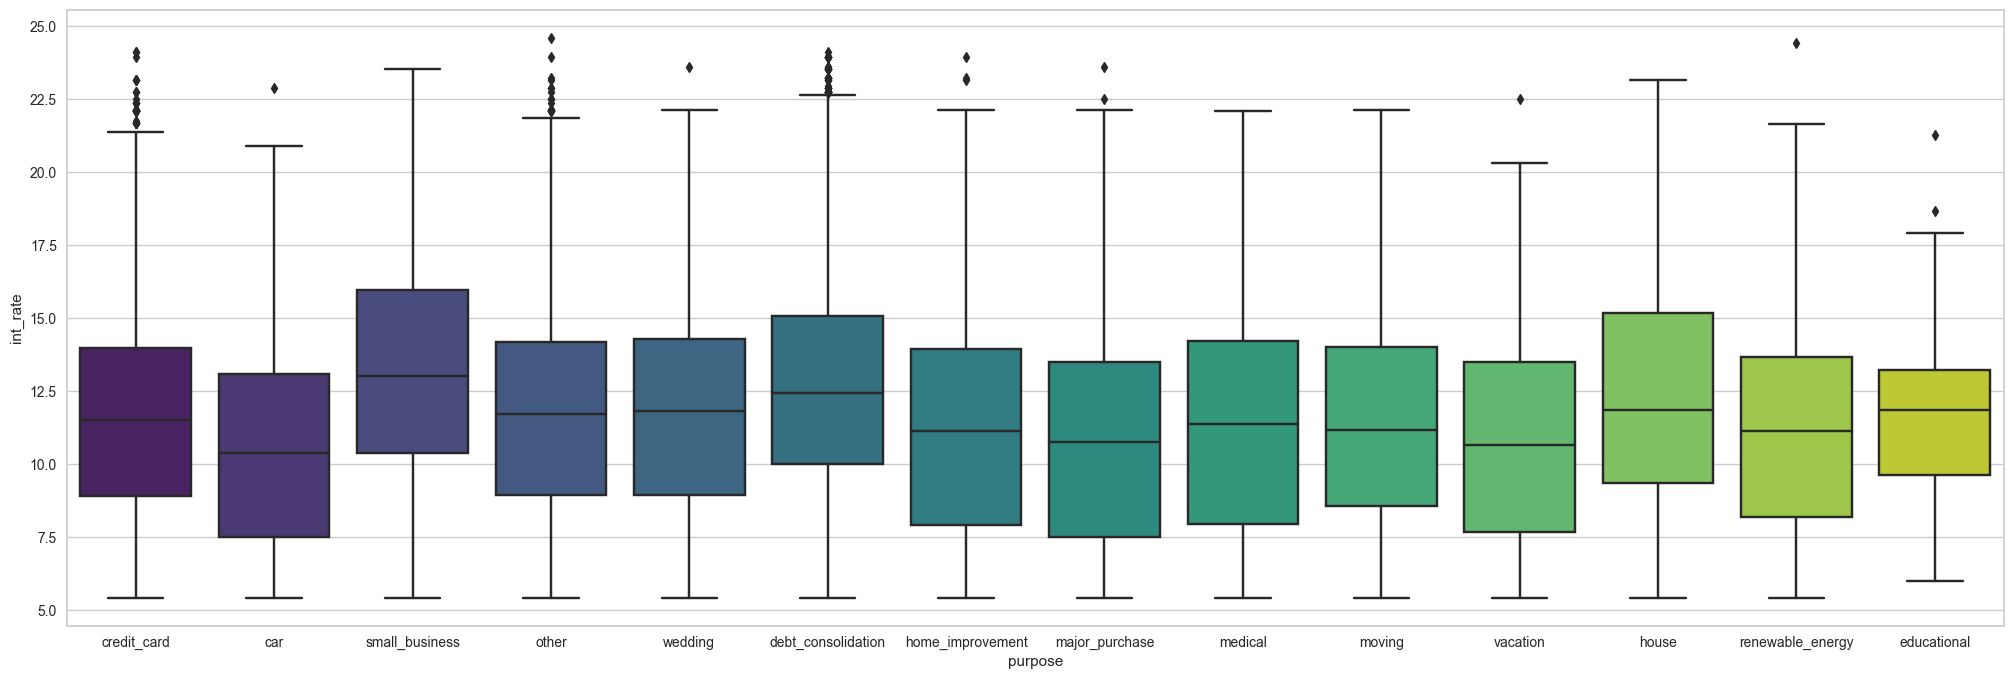

In [314]:
#box plot of int_rate and term (interest rate is higher with longer loan terms)
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="purpose", y="int_rate", palette="viridis")

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

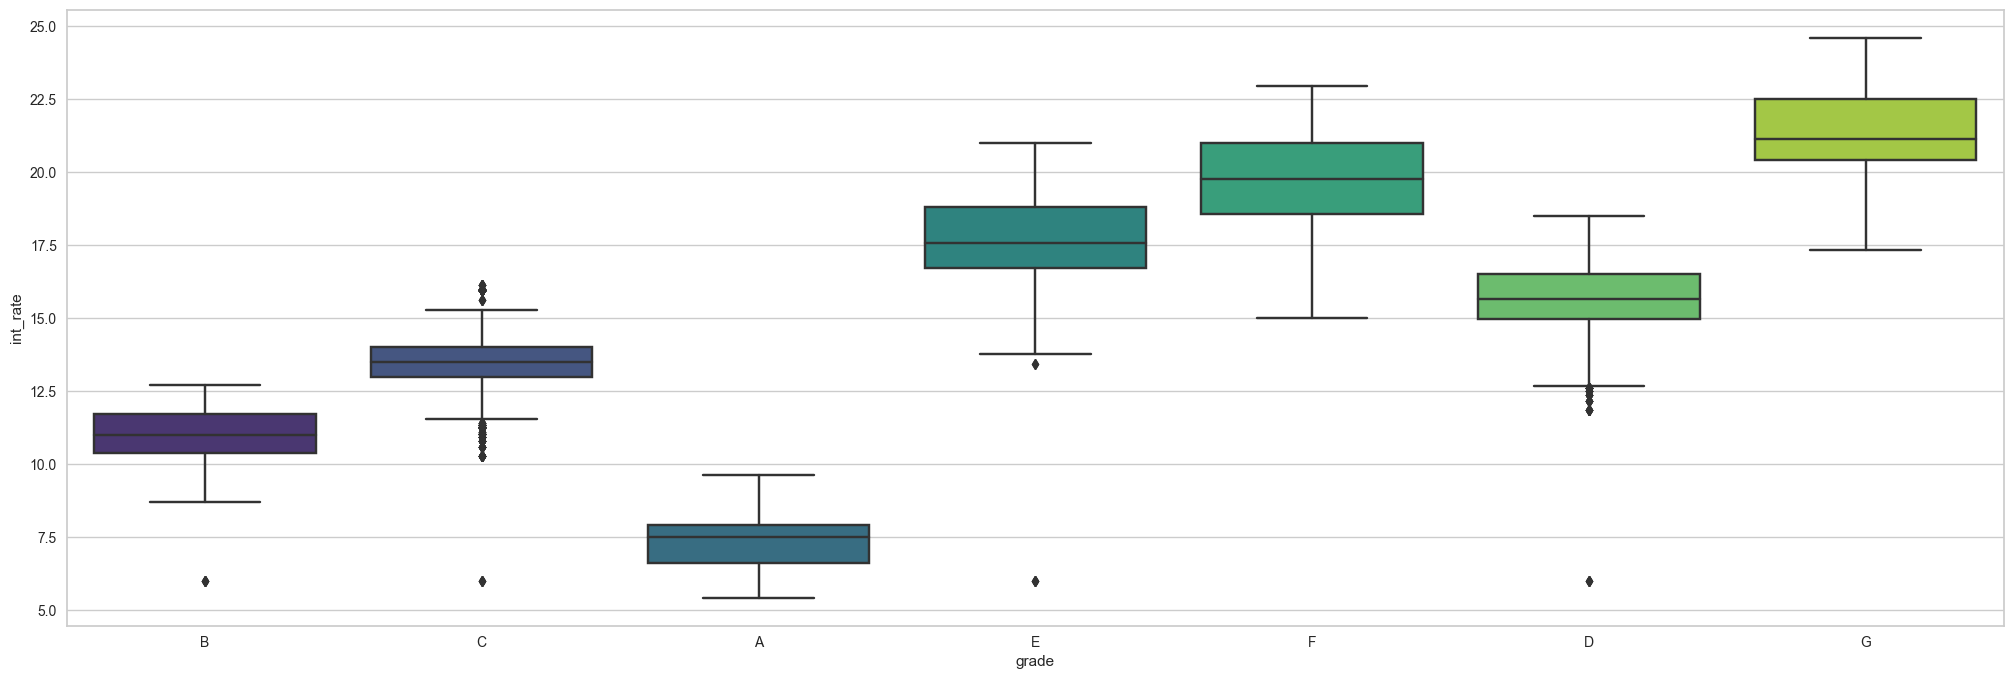

In [315]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="grade", y="int_rate", palette="viridis")

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

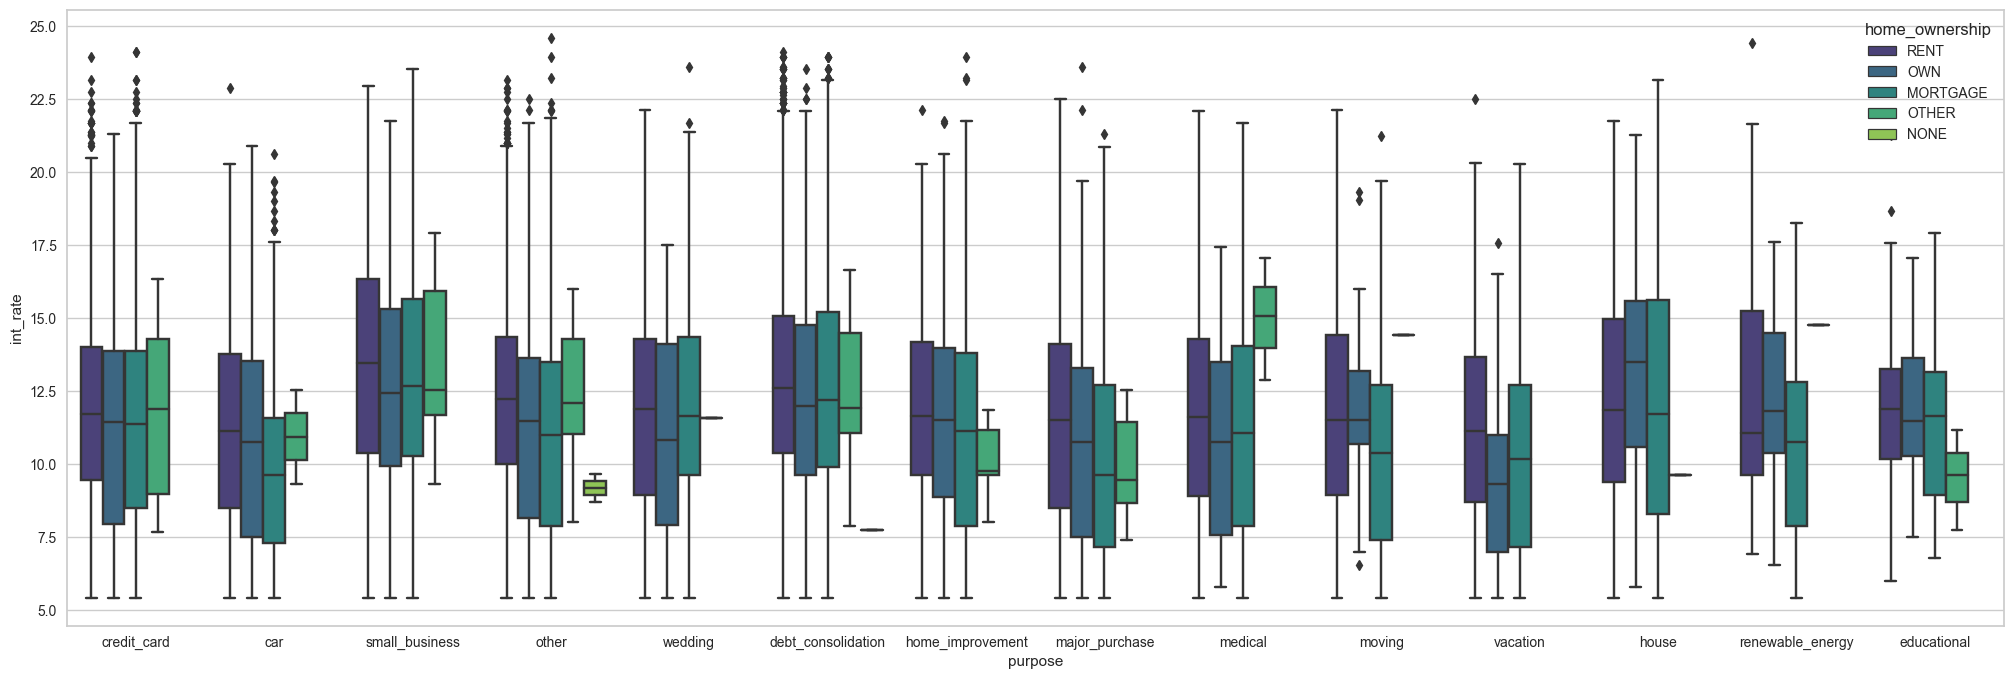

In [316]:
plt.figure(figsize=(25,8))
sns.boxplot(data=df, x="purpose", y="int_rate", hue= "home_ownership", palette= "viridis")

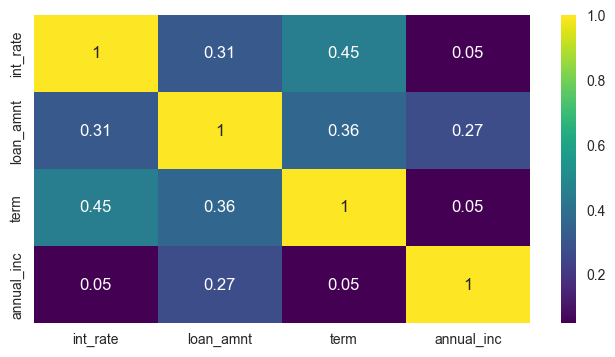

In [317]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= df.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True, cmap= "viridis")
fgr.savefig("myimage.png")

## Data Preparation

In [318]:
#Checking if there is any missing value in the data/ no missing value
df.isna().any().any()

False

In [319]:
df.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [320]:
# checking the type of the columns to know categorical values that we have to transform on the dataset
print(df.dtypes)

int_rate          float64
loan_amnt           int64
term                int64
grade              object
home_ownership     object
annual_inc        float64
purpose            object
dtype: object


In [321]:
#Changing grade column as categorical value (grade is ordinal) helps to convert each of them into respective numeric value. There are 3 steps to do that.
# 1.Changing the type of "garde" column to categorical
df["grade"] = df["grade"].astype("category")
print(df.dtypes)

int_rate           float64
loan_amnt            int64
term                 int64
grade             category
home_ownership      object
annual_inc         float64
purpose             object
dtype: object


In [322]:
# 2.Providing the correct order of categories 
df.grade =df.grade.cat.reorder_categories(["A","B","C","D","E","F","G"])

In [323]:
# 3.Encoding categories with integer values 
df.grade= df.grade.cat.codes

In [324]:
# for the nominal variables, there is no order of rank between "homeownership" or "purpose" columns.The previous approach is not useful anymore. So the transformation applied by using dummy variables approach.
# geting dummies and saving them inside new dataframe for "home_ownership" and "purpose" columns.
dummies1= pd.get_dummies(df.home_ownership)
dummies2= pd.get_dummies(df.purpose)

In [325]:
# mergng all dataframes
merged =pd.concat([df,dummies1,dummies2],axis="columns")
merged

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose,MORTGAGE,NONE,OTHER,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10.65,5000,36,1,RENT,24000.0,credit_card,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.27,2500,60,2,RENT,30000.0,car,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.96,2400,36,2,RENT,12252.0,small_business,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10000,36,2,RENT,49200.0,other,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,12.69,3000,60,1,RENT,80000.0,other,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,8.07,2500,36,0,MORTGAGE,110000.0,home_improvement,1,0,0,...,1,0,0,0,0,0,0,0,0,0
39782,10.28,8500,36,2,RENT,18000.0,credit_card,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39783,8.07,5000,36,0,MORTGAGE,100000.0,debt_consolidation,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39784,7.43,5000,36,0,MORTGAGE,200000.0,other,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [326]:
#dropping categorical variables:"home_ownership","purpose" as already created dummy variables for these two column.
#dropping 2 dummy columns to avoid "dummy variable trap" in regression model.he Dummy Variable trap van happenif independent variables are multicollinear. In order to avoid this,one of the dummy variable for each categorical values was droped("moving and others")
df_final= merged.drop(["home_ownership","purpose","moving","other"], axis="columns")

In [327]:
#final dataset
df_final

,int_rate,loan_amnt,term,grade,annual_inc,MORTGAGE,NONE,OTHER,OWN,RENT,...,debt_consolidation,educational,home_improvement,house,major_purchase,medical,renewable_energy,small_business,vacation,wedding
0,10.65,5000,36,1,24000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.27,2500,60,2,30000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15.96,2400,36,2,12252.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,13.49,10000,36,2,49200.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.69,3000,60,1,80000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,8.07,2500,36,0,110000.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39782,10.28,8500,36,2,18000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39783,8.07,5000,36,0,100000.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39784,7.43,5000,36,0,200000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
# tried to scale data before splitting but the results of models was tha same with the ones without scaling so I skipped Min Max scaling.

In [329]:
#droping dependent value from dataset before splitting
x= df_final.drop(["int_rate"], axis="columns")
x

,loan_amnt,term,grade,annual_inc,MORTGAGE,NONE,OTHER,OWN,RENT,car,...,debt_consolidation,educational,home_improvement,house,major_purchase,medical,renewable_energy,small_business,vacation,wedding
0,5000,36,1,24000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2500,60,2,30000.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2400,36,2,12252.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,10000,36,2,49200.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3000,60,1,80000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500,36,0,110000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39782,8500,36,2,18000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39783,5000,36,0,100000.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
39784,5000,36,0,200000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
#keeping dependent value in the dataset before splitting
y=df_final["int_rate"]
y

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39781     8.07
39782    10.28
39783     8.07
39784     7.43
39785    13.75
Name: int_rate, Length: 39786, dtype: float64

In [331]:
#Splitting the dataset by applying random_state to use the same split of data.
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.2, random_state=42)

## Modeling

### Model 1: Multiple Linear Regresion

In [332]:
# linear regresion model fitting to x_train and y_train
model1 = LinearRegression().fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



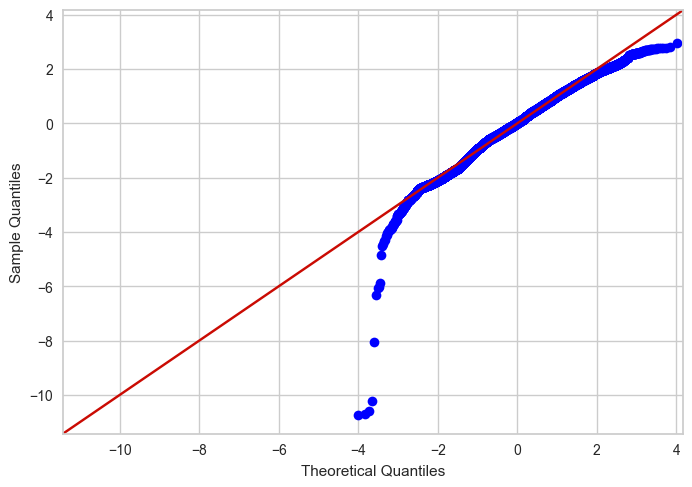

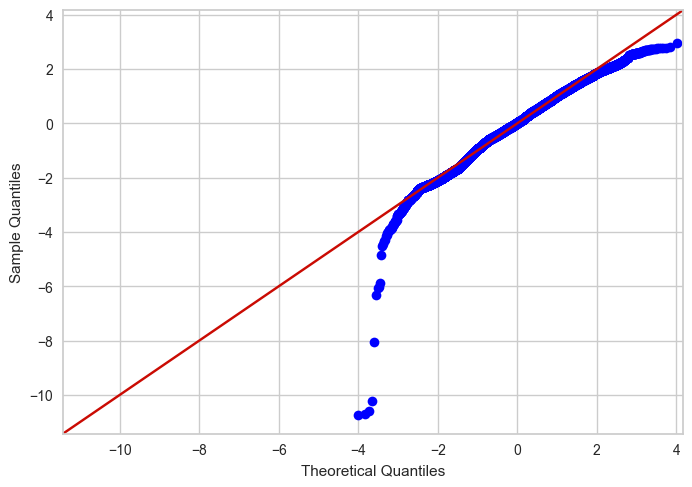

In [333]:
#checking whether resisuals are normally distributed /linear regression assumption 
y_pred=model1.predict(x_train)
residuals=y_train.values-y_pred
sm.qqplot(residuals,line="45",fit=True, dist=stats.norm)

### Evaluation of Linear Regression Model

In [334]:
predictions = model1.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 8. 18. 18. 11. 16.  8.  8. 18. 11.  8.]
Actual labels   :  22900     5.79
27960    17.93
32773    16.45
16463    10.74
22822    14.46
12833     5.42
17036     7.66
29184    16.82
30104    10.99
26804     7.14
Name: int_rate, dtype: float64


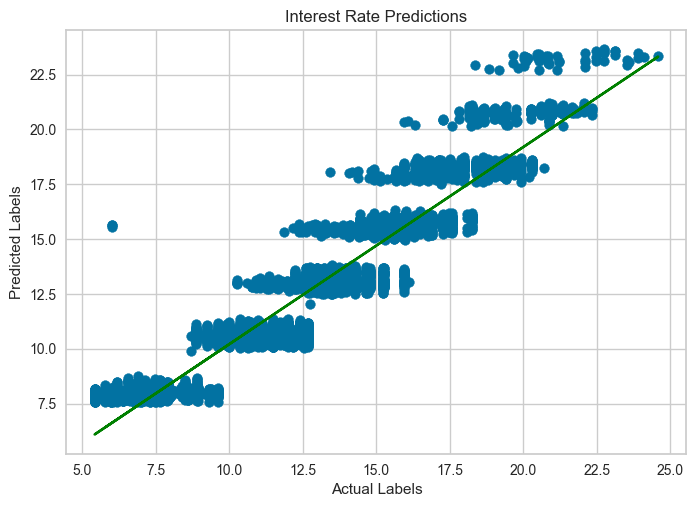

In [335]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green')
plt.show()

In [336]:
# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 1.3401608423994482
RMSE: 1.157653161529587
R2: 0.9022602911185348


### Model 2: Gradient Boosting

GradientBoostingRegressor() 

MSE: 1.0084819483871488
RMSE: 1.0042320192003185
R2: 0.9264500730590713


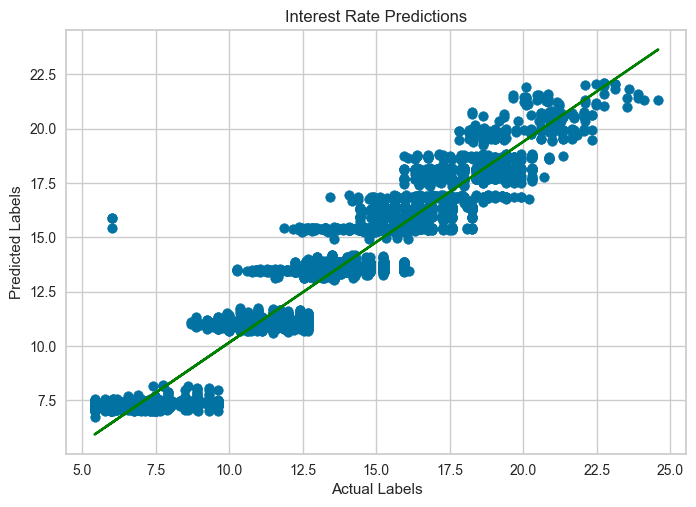

In [337]:
# First, tried Random Forest but Gradient Bossting evaluation results are better than Random Forest. The main differences between them,  Random Forest created trees in parallel while Grandient Boosting creates them sequentially. This gives Gradient Boosting an ability to learn from weak learners. 
# Base line model / Fiting Gradient Boosting model on the training set
model2 = GradientBoostingRegressor().fit(x_train, y_train)
print (model2, "\n")

# Evaluate the model using the test data
predictions = model2.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 1.007888736865809
RMSE: 1.0039366199446103
R2: 0.9264933367626259


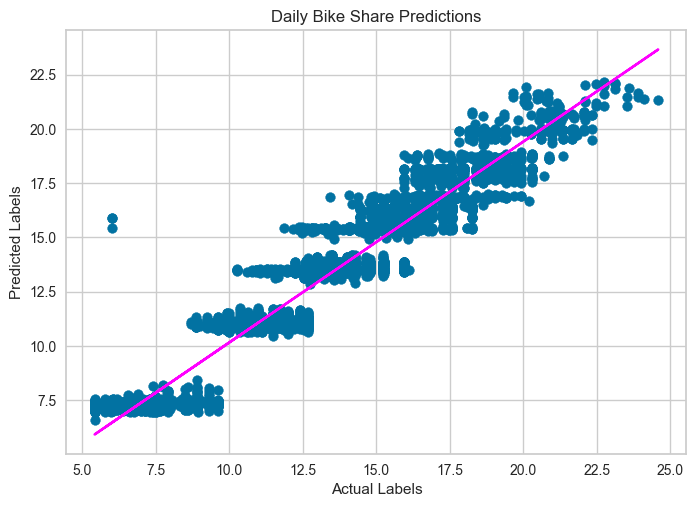

In [359]:
#Hyperparameter tunning with Gradient Boosting
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch3 = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch3.fit(x_train, y_train)
print("Best parameter combination:", gridsearch3.best_params_, "\n")

# Get the best model
model3=gridsearch3.best_estimator_
print(model3, "\n")

# Evaluate the model using the test data
predictions = model3.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# best_score_ from GridSearchCV is the mean cross-validated score of the best_estimator
#tuning hyperparameters with cross-Validation in the above context is one of the methods that helps you to prevent overfitting.

In [357]:
results = pd.DataFrame(gridsearch3.cv_results_)
results.sort_values(by='rank_test_score', inplace=True)

In [352]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,2.902353,0.255786,0.034495,0.006671,0.1,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.928600,0.928978,0.927219,0.928266,0.000756,1,0.930135,0.929772,0.930684,0.930197,0.000375
1,1.739111,0.036227,0.022653,0.000433,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.928665,0.928958,0.927099,0.928240,0.000816,2,0.929412,0.929116,0.929998,0.929509,0.000367
0,0.938304,0.085629,0.016348,0.000256,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.928412,0.928703,0.926780,0.927965,0.000847,3,0.928268,0.928080,0.928976,0.928441,0.000386
3,0.844269,0.010682,0.011809,0.001038,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.927850,0.928355,0.926578,0.927594,0.000748,4,0.931276,0.931125,0.932067,0.931490,0.000413
4,1.663421,0.006361,0.017165,0.000243,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.926877,0.927912,0.926415,0.927068,0.000626,5,0.933523,0.933193,0.934162,0.933626,0.000402
5,2.506962,0.020870,0.024081,0.000121,0.5,150,"{'learning_rate': 0.5, 'n_estimators': 150}",0.925722,0.927393,0.925546,0.926220,0.000832,6,0.935575,0.935255,0.935980,0.935603,0.000297
6,0.846362,0.022320,0.014470,0.004588,1.0,50,"{'learning_rate': 1.0, 'n_estimators': 50}",0.925446,0.925015,0.924791,0.925084,0.000272,7,0.932335,0.932533,0.933316,0.932728,0.000424
7,1.703725,0.066016,0.017297,0.000170,1.0,100,"{'learning_rate': 1.0, 'n_estimators': 100}",0.922894,0.922896,0.922852,0.922880,0.000020,8,0.935374,0.935496,0.936116,0.935662,0.000325
8,2.505767,0.060250,0.023270,0.000344,1.0,150,"{'learning_rate': 1.0, 'n_estimators': 150}",0.920554,0.921235,0.920953,0.920914,0.000280,9,0.937857,0.937827,0.938467,0.938050,0.000295


In [358]:
gbm_gridperf1 = model3.get_grid(sort_by='auc', decreasing=True)

AttributeError: 'GradientBoostingRegressor' object has no attribute 'get_grid'

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END learning_rate=0.05, n_estimators=30;, score=(train=0.880, test=0.880) total time=   0.8s
[CV 2/5] END learning_rate=0.05, n_estimators=30;, score=(train=0.880, test=0.882) total time=   0.6s
[CV 3/5] END learning_rate=0.05, n_estimators=30;, score=(train=0.879, test=0.881) total time=   0.6s
[CV 4/5] END learning_rate=0.05, n_estimators=30;, score=(train=0.881, test=0.878) total time=   0.6s
[CV 5/5] END learning_rate=0.05, n_estimators=30;, score=(train=0.879, test=0.878) total time=   0.6s
[CV 1/5] END learning_rate=0.05, n_estimators=60;, score=(train=0.925, test=0.925) total time=   1.3s
[CV 2/5] END learning_rate=0.05, n_estimators=60;, score=(train=0.924, test=0.926) total time=   1.2s
[CV 3/5] END learning_rate=0.05, n_estimators=60;, score=(train=0.924, test=0.926) total time=   1.4s
[CV 4/5] END learning_rate=0.05, n_estimators=60;, score=(train=0.926, test=0.920) total time=   1.2s
[CV 5/5] END learnin

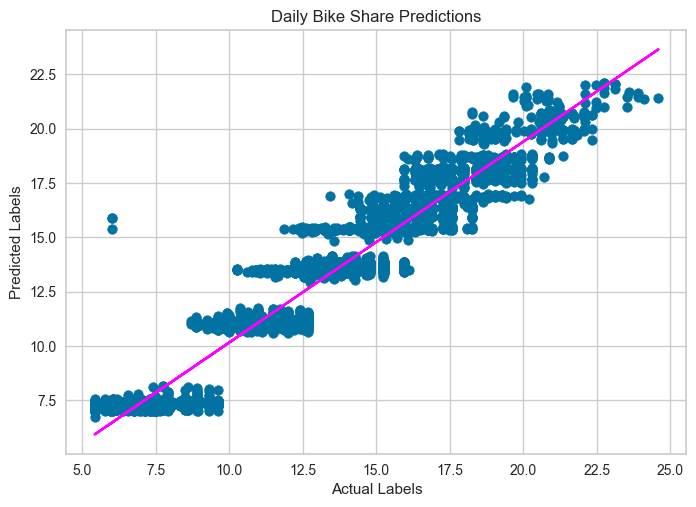

In [349]:
#Hyperparameter tunning with Gradient Boosting
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.05, 0.1, 0.2, 0.3],
 'n_estimators' : [30, 60, 80, 100, 200, 250, 300]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True, verbose=3)
gridsearch.fit(x_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model4=gridsearch.best_estimator_
print(model4, "\n")

# Evaluate the model using the test data
predictions = model4.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [342]:
gridsearch.best_params_, gridsearch.best_score_

({'learning_rate': 0.05, 'n_estimators': 200}, 0.9282659582040664)

In [346]:
# Get the best model
model4= gridsearch.best_params_
print(model4, "\n")

# Evaluate the model using the test data
predictions = model4.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

0.9282675941889886 



AttributeError: 'numpy.float64' object has no attribute 'predict'